In [1]:
# Required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../measurements.csv', encoding="utf-8", skipinitialspace=True)
df


,Zone,Datetime,Bandwidth,Upload Jitter,Download Jitter,Upload Packet Loss,Download Packet Loss,Upload Bit Rate (With TCP),Download Bit Rate (With TCP),Max Bit Rate (With TCP),One-Way Delay
0,europe-west1-b,Saturday 6 May 10:15,90.0 M,0.839,0.0,0.0,0,91.6 M,92.6 M,100.5 M,13.68
1,me-west1-a,Saturday 6 May 10:19,88.6 M,0.725,0.0,0.0,0,91.8 M,91.6 M,108.5 M,42.23
2,asia-east2-a,Saturday 6 May 10:22,70.7 M,0.740,0.0,0.0,0,68.9 M,65.4 M,90.6 M,134.45
3,europe-west1-b,Saturday 6 May 12:37,92.0 M,0.767,0.0,0.0,0,92.3 M,92.3 M,105.1 M,14.30
4,asia-east2-a,Saturday 6 May 12:43,62.7 M,0.935,0.0,0.0,0,72.9 M,59.8 M,80.5 M,178.05
...,...,...,...,...,...,...,...,...,...,...,...
85,europe-west1-b,Thursday 11 May 10:5,91.0 M,0.739,0.0,0.0,0,91.6 M,92.8 M,101.5 M,13.80
86,asia-east2-a,Thursday 11 May 10:10,31.5 M,0.781,0.0,0.0,0,69.6 M,69.1 M,90.2 M,195.54
87,australia-southeast1-a,Thursday 11 May 10:20,17.2 M,0.715,0.0,0.0,0,68.7 M,65.1 M,89.5 M,195.20
88,me-west1-a,Thursday 11 May 10:25,89.8 M,0.882,0.0,0.0,0,90.2 M,91.2 M,104.0 M,43.11


In [2]:
def parse_datetime(df):
    date_time_parts = df['Datetime'].str.split(' ')
    df['Week day'] = date_time_parts.str[0]
    df['Day'] = date_time_parts.str[1]
    df['Month'] = date_time_parts.str[2]
    time_parts = date_time_parts.str[3].str.split(':')
    df['Hour'] = time_parts.str[0]
    df['Minute'] = time_parts.str[1]

    df['Day'] = df['Day'].astype(str).astype(int)
    df['Hour'] = df['Hour'].astype(str).astype(int)
    df['Minute'] = df['Minute'].astype(str).astype(int)


parse_datetime(df)
df = df.drop("Datetime", axis=1)

In [3]:
variables_list = ["Bandwidth", "Upload Bit Rate (With TCP)",
                  "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)"]

#Converte as variáveis em "bits/sec"
def convert_variable(variables_list, df):
    scale = {'K': 10**3, 'M': 10**6, 'G': 10**9}
    for var in variables_list:
        if var in df.columns:
            col = df[var]
            num = col.str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)
            unit = col.str.extract(r'([KMG])', expand=False)
            if not unit.empty:
                unit = unit.map(scale)
                df[var] = num * unit



convert_variable(variables_list, df)



In [4]:
# Details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          90 non-null     object 
 1   Bandwidth                     90 non-null     float64
 2   Upload Jitter                 90 non-null     float64
 3   Download Jitter               90 non-null     float64
 4   Upload Packet Loss            90 non-null     float64
 5   Download Packet Loss          90 non-null     int64  
 6   Upload Bit Rate (With TCP)    90 non-null     float64
 7   Download Bit Rate (With TCP)  90 non-null     float64
 8   Max Bit Rate (With TCP)       90 non-null     float64
 9   One-Way Delay                 90 non-null     float64
 10  Week day                      90 non-null     object 
 11  Day                           90 non-null     int32  
 12  Month                         90 non-null     object 
 13  Hour   

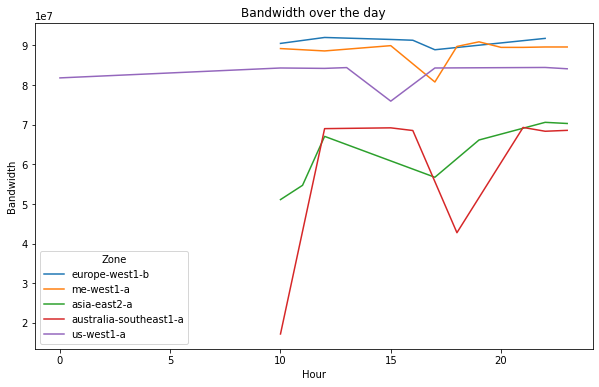

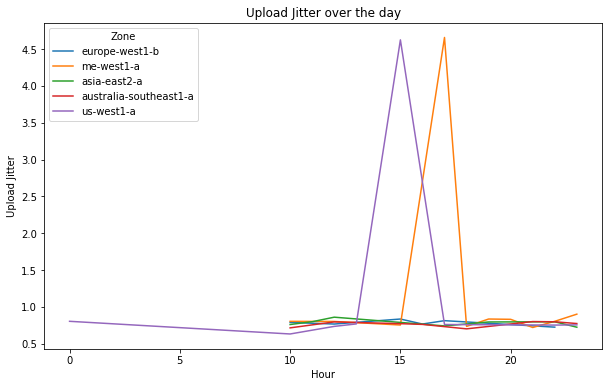

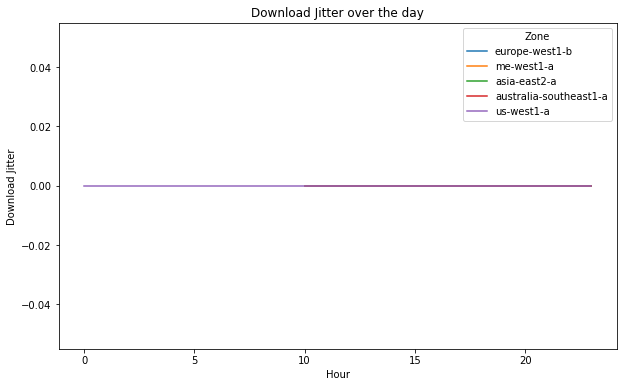

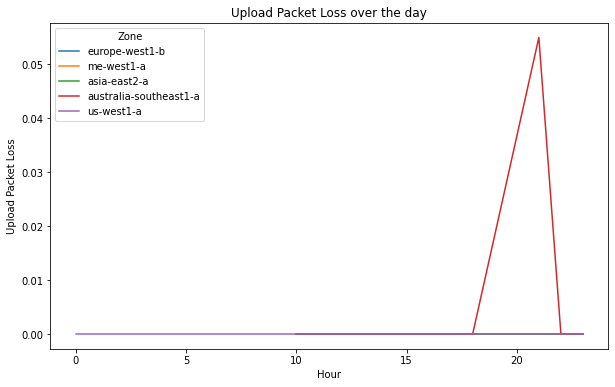

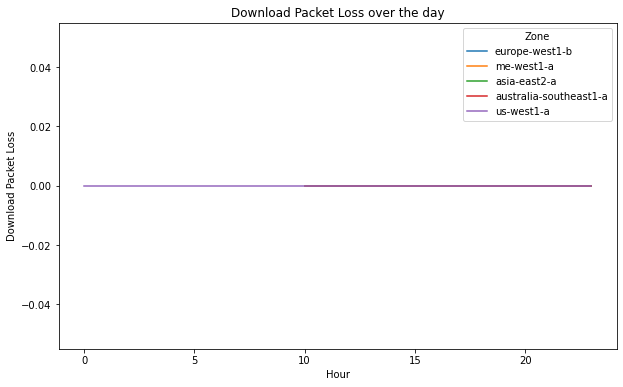

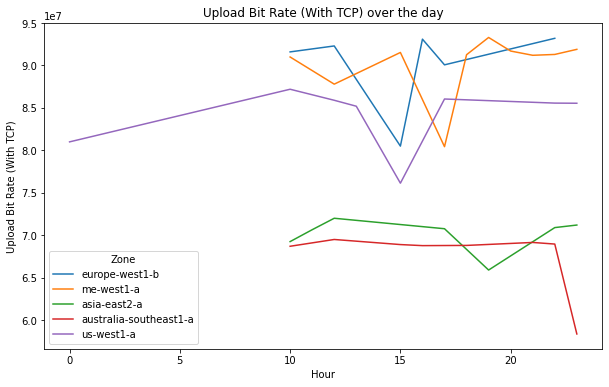

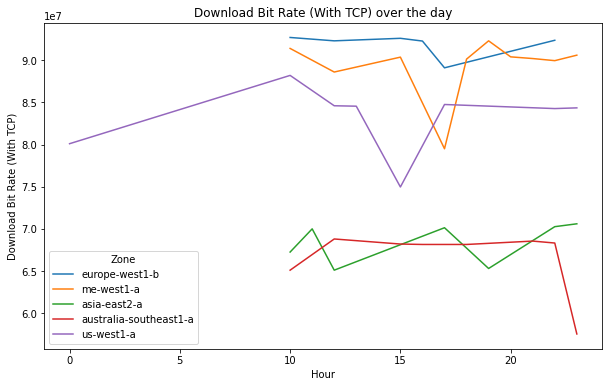

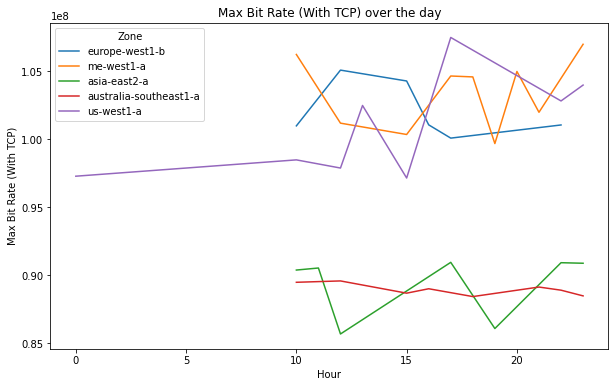

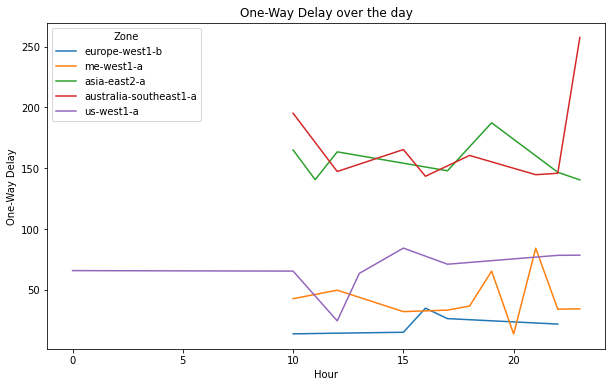

In [5]:
columns = ["Bandwidth", "Upload Jitter", "Download Jitter", "Upload Packet Loss", "Download Packet Loss",           
           "Upload Bit Rate (With TCP)", "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)", "One-Way Delay"]

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Hour', y=col, data=df, hue='Zone', ax=ax, errorbar=None)
    ax.set_title(f"{col} over the day")
    ax.set_ylabel(col)
    ax.set_xlabel("Hour")
    #ax.ticklabel_format(style='plain', axis='y')
    plt.savefig(f"{col}_24.png")
    plt.show()


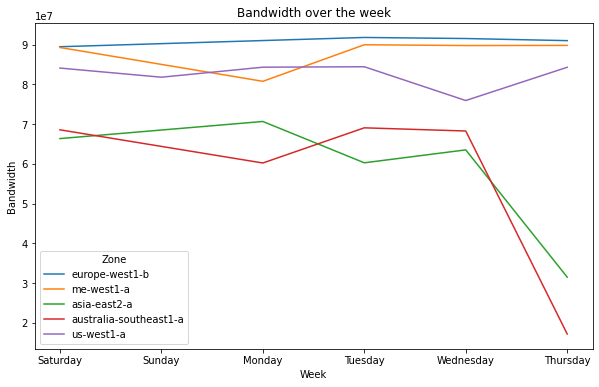

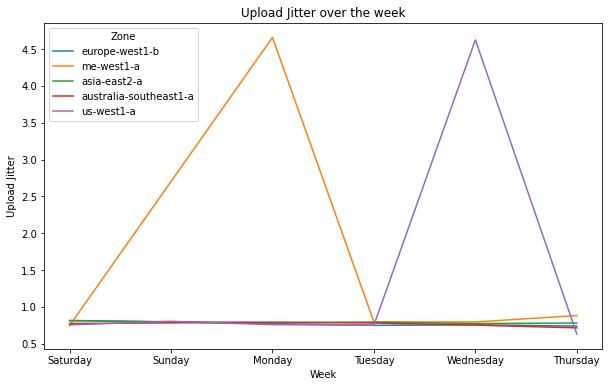

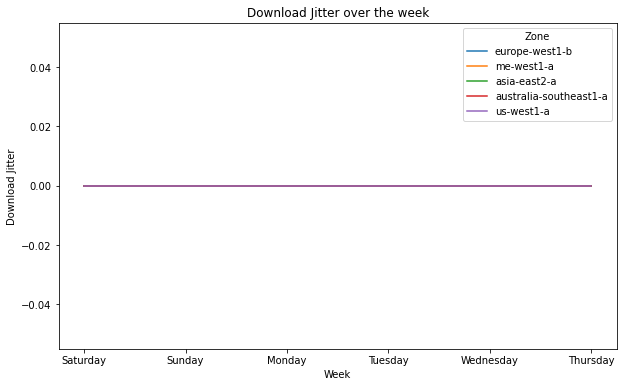

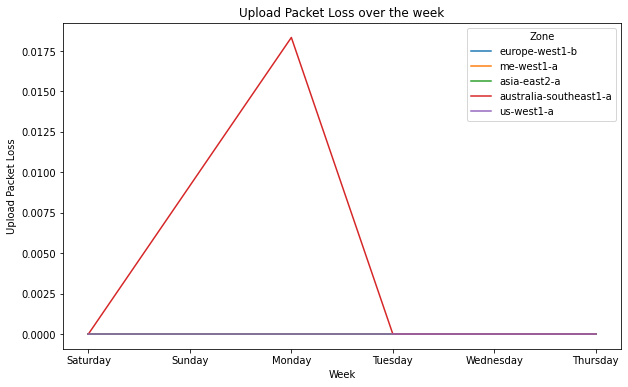

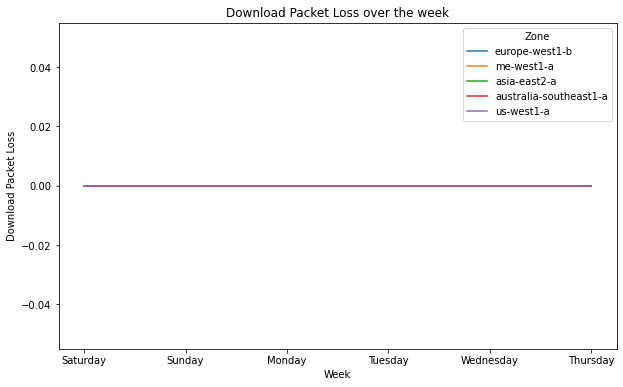

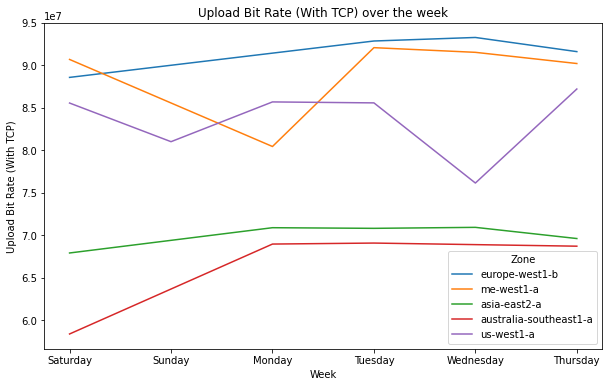

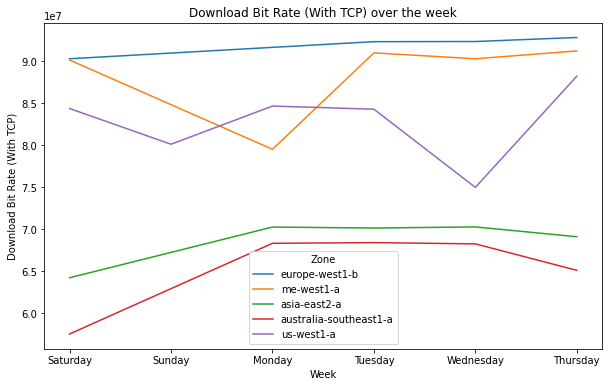

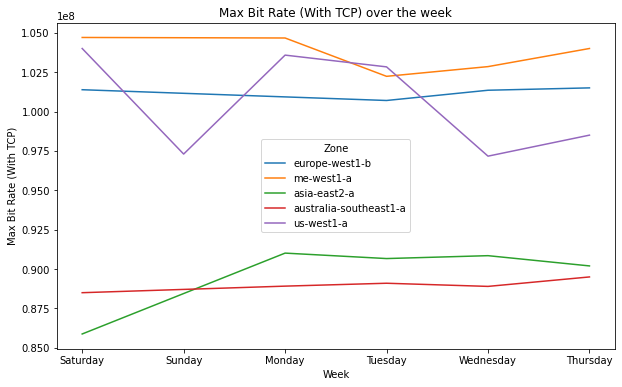

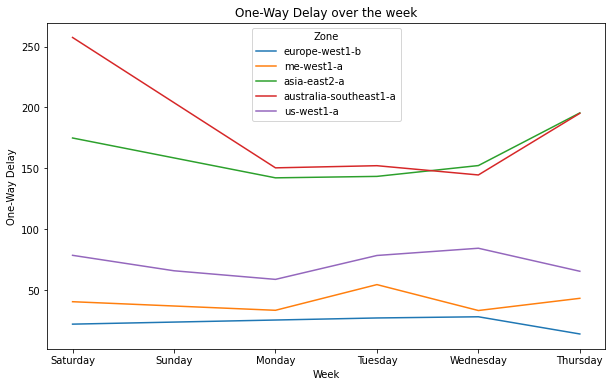

In [6]:
columns = ["Bandwidth", "Upload Jitter", "Download Jitter", "Upload Packet Loss", "Download Packet Loss",           
           "Upload Bit Rate (With TCP)", "Download Bit Rate (With TCP)", "Max Bit Rate (With TCP)", "One-Way Delay"]

for col in columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Week day', y=col, data=df, hue='Zone', ax=ax, errorbar=None)
    ax.set_title(f"{col} over the week")
    ax.set_ylabel(col)
    ax.set_xlabel("Week")
    #ax.ticklabel_format(style='plain', axis='y')
    plt.savefig(f"{col}_week.png")
    plt.show()
